<a href="https://colab.research.google.com/github/Naveentechie/New-York-Stock-Prediction-Model/blob/main/NewYorkStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sb
import tensorflow as tf
import plotly.express as px

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-3-addd85430891>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_openclose.corr()


<Axes: >

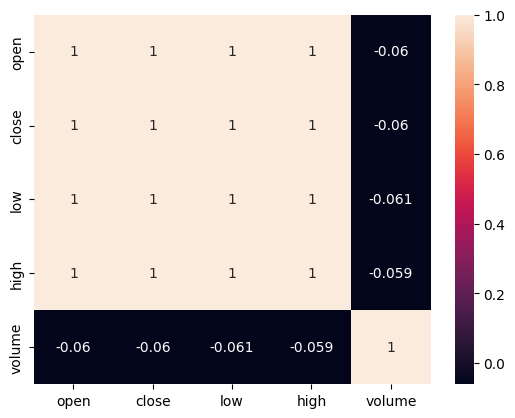

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/prices.csv')

df_openclose = df

# Create correlation matrix
corr = df_openclose.corr()

# Create heatmap using seaborn
sb.heatmap(corr, annot=True)



In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.shape

(851264, 7)

descriptive analysis

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
df.isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [ ]:

df['date'] = pd.to_datetime(df['date']).dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


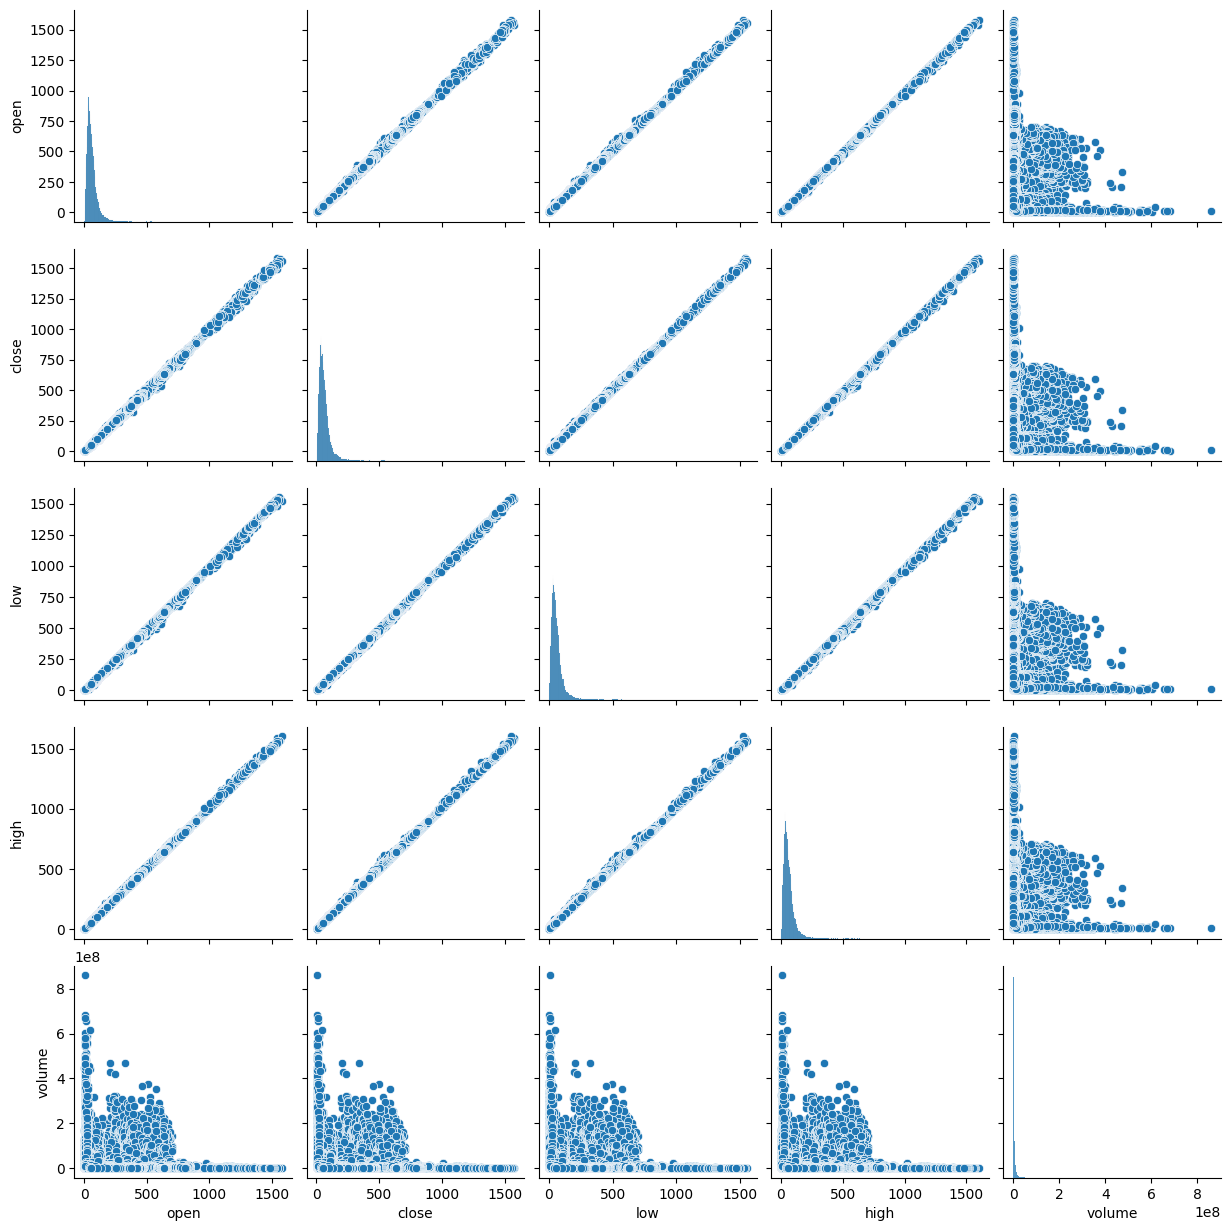

In [ ]:
sb.pairplot(df)



In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
# Get user input for stock symbol
stock_symbol = input("Enter the stock symbol: ")

# Filter the dataset to get data for the specified stock symbol
stock_data = df[df['symbol'] == stock_symbol]

# Print the stock data
print(stock_data)
dataset = stock_data

Enter the stock symbol: WLTW
           date symbol        open       close         low        high  \
0    2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1    2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2    2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3    2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4    2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
..          ...    ...         ...         ...         ...         ...   
246  2016-12-23   WLTW  123.089996  124.489998  122.709999  124.660004   
247  2016-12-27   WLTW  124.570000  124.279999  124.010002  124.900002   
248  2016-12-28   WLTW  124.300003  122.379997  121.900002  124.300003   
249  2016-12-29   WLTW  122.449997  122.169998  121.599998  123.070000   
250  2016-12-30   WLTW  122.589996  122.279999  121.389999  123.559998   

        volume  
0    2163600.0  
1    2386400.0  
2    2489500.0  
3    2006300.0

**visualization of the dataset**

<Axes: >

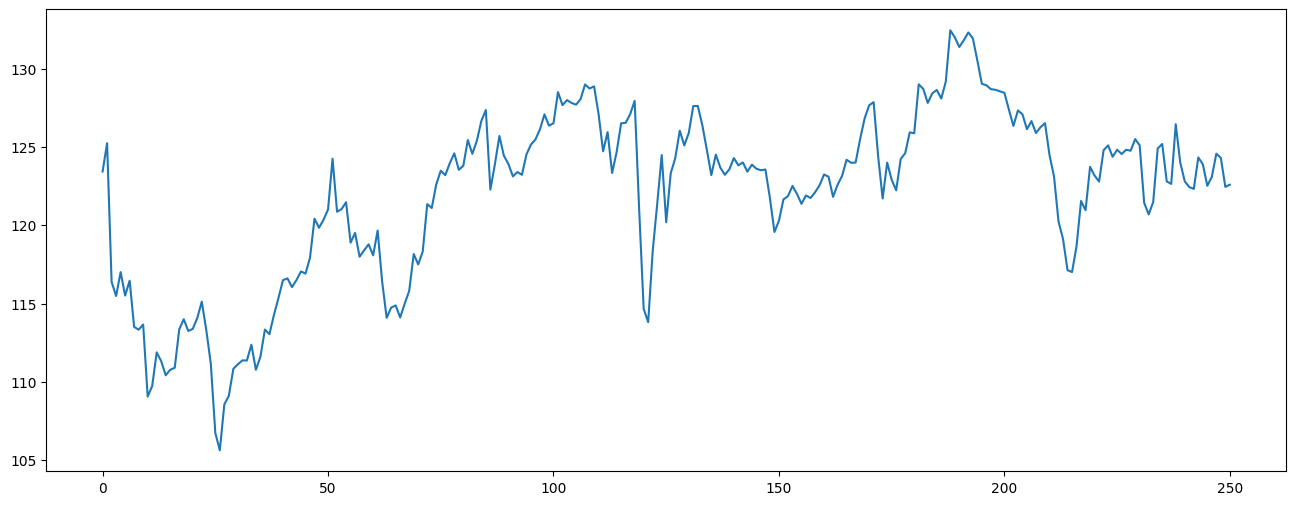

In [ ]:
dataset['open'].plot(figsize=(16,6))

<Axes: >

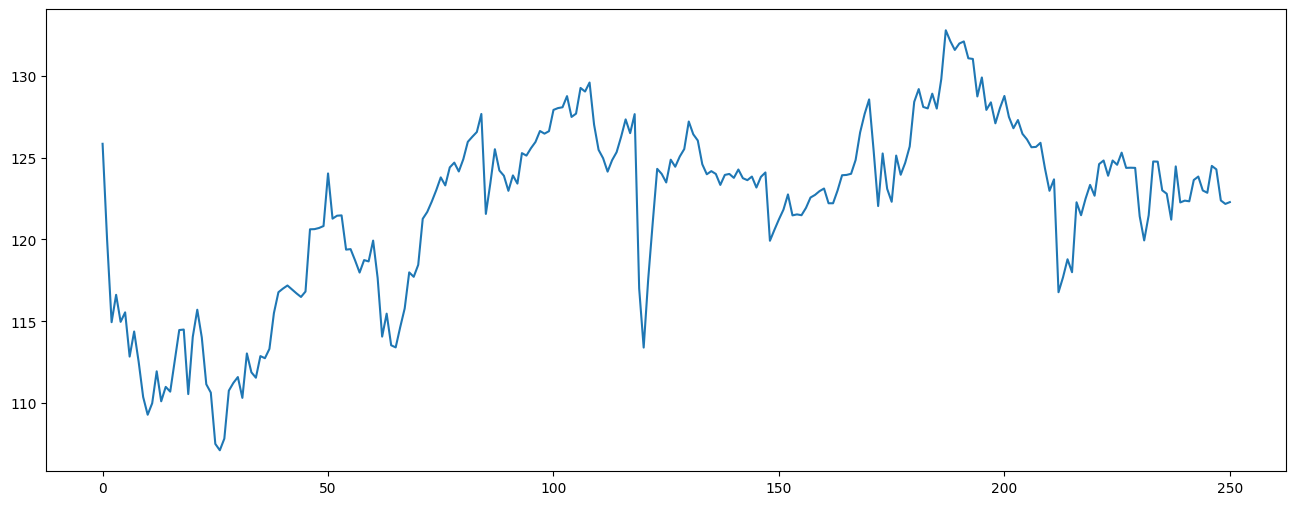

In [ ]:
dataset['close'].plot(figsize=(16,6))

In [ ]:
dataset.index = pd.DatetimeIndex(dataset.date)
dataset

,date,symbol,open,close,low,high,volume
date,,,,,,,
2016-01-05,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
2016-12-23,2016-12-23,WLTW,123.089996,124.489998,122.709999,124.660004,361900.0
2016-12-27,2016-12-27,WLTW,124.570000,124.279999,124.010002,124.900002,382900.0
2016-12-28,2016-12-28,WLTW,124.300003,122.379997,121.900002,124.300003,429900.0


In [ ]:
dataset = dataset.drop(labels = ['date'],axis = 1)
dataset

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-23,WLTW,123.089996,124.489998,122.709999,124.660004,361900.0
2016-12-27,WLTW,124.570000,124.279999,124.010002,124.900002,382900.0
2016-12-28,WLTW,124.300003,122.379997,121.900002,124.300003,429900.0


In [ ]:
x  = dataset[['open','high','low','volume']]
y = dataset['close']

**Spliting train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train

,open,high,low,volume
date,,,,
2016-06-06,127.699997,128.750000,124.660004,536700.0
2016-07-15,126.400002,126.400002,124.070000,512200.0
2016-06-15,125.949997,125.949997,123.699997,378700.0
2016-02-02,113.250000,113.860001,109.750000,694800.0
2016-12-19,122.320000,123.970001,121.790001,937600.0
...,...,...,...,...
2016-03-09,117.050003,117.309998,115.500000,796500.0
2016-03-30,118.400002,119.669998,118.120003,443200.0
2016-11-16,123.169998,123.169998,122.250000,818400.0


In [ ]:
x_train.shape

(200, 4)

In [ ]:
y_train

date
2016-06-06    127.680000
2016-07-15    124.589996
2016-06-15    124.139999
2016-02-02    110.559998
2016-12-19    123.629997
                 ...    
2016-03-09    116.489998
2016-03-30    118.739998
2016-11-16    122.669998
2016-05-25    126.459999
2016-10-14    128.369995
Name: close, Length: 200, dtype: float64

In [ ]:
y_train.shape

(200,)

In [ ]:
x_test

,open,high,low,volume
date,,,,
2016-06-01,127.669998,128.139999,126.750000,441500.0
2016-01-26,110.419998,111.400002,107.300003,563100.0
2016-07-12,125.889999,127.320000,125.370003,844000.0
2016-02-29,113.040001,115.360001,111.650002,971600.0
2016-01-11,117.010002,117.330002,114.089996,1408600.0
2016-05-26,126.360001,126.980003,125.419998,627000.0
2016-11-22,124.370003,125.400002,122.919998,1011700.0
2016-08-29,123.150002,124.760002,122.910004,456500.0
2016-10-19,128.460007,129.429993,127.879997,435600.0


In [ ]:
x_test.shape

(51, 4)

In [ ]:
y_test

date
2016-06-01    128.070007
2016-01-26    111.000000
2016-07-12    127.199997
2016-02-29    113.320000
2016-01-11    114.970001
2016-05-26    126.610001
2016-11-22    124.820000
2016-08-29    123.919998
2016-10-19    128.759995
2016-07-01    124.000000
2016-05-12    123.889999
2016-08-31    124.010002
2016-06-14    124.959999
2016-08-08    120.589996
2016-05-11    124.209999
2016-06-27    113.400002
2016-01-12    115.550003
2016-01-07    114.949997
2016-01-28    112.580002
2016-02-18    111.599998
2016-03-11    120.620003
2016-04-14    117.720001
2016-08-26    122.989998
2016-03-08    116.709999
2016-02-04    115.709999
2016-11-09    118.000000
2016-03-10    116.820000
2016-05-23    125.949997
2016-04-28    124.150002
2016-06-22    126.489998
2016-07-21    123.330002
2016-03-03    117.000000
2016-12-08    123.000000
2016-10-12    129.889999
2016-01-08    116.620003
2016-09-22    129.179993
2016-08-19    122.720001
2016-08-24    122.209999
2016-11-08    118.790001
2016-07-07    124.44

In [ ]:
y_test.shape

(51,)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(200, 4) (51, 4) (200,) (51,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)
y_train = y_train.values.reshape(-1,1)
y_train_scale = scaler.fit_transform(y_train)
y_test = y_test.values.reshape(-1,1)
y_test_scale = scaler.fit_transform(y_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=200,activation = 'relu',input_shape = (4,)))
model.add(tf.keras.layers.Dense(units=250,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=250,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=250,activation = 'relu'))
model.add(tf.keras.layers.Dense(units=200,activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 250,activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 250)               50250     
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dense_4 (Dense)             (None, 200)               50200     
                                                                 
 dense_5 (Dense)             (None, 250)               50250     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=opt, loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(x_train_scale, y_train_scale, epochs=250, batch_size=16,validation_split = 0.4)

Epoch 1/250
8/8 [==============================] - 3s 57ms/step - loss: 0.5220 - val_loss: 0.1769
Epoch 2/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0774 - val_loss: 0.1045
Epoch 3/250
8/8 [==============================] - 0s 16ms/step - loss: 0.0708 - val_loss: 0.0441
Epoch 4/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0690 - val_loss: 0.0406
Epoch 5/250
8/8 [==============================] - 0s 15ms/step - loss: 0.0395 - val_loss: 0.0294
Epoch 6/250
8/8 [==============================] - 0s 10ms/step - loss: 0.0389 - val_loss: 0.0274
Epoch 7/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0415 - val_loss: 0.0474
Epoch 8/250
8/8 [==============================] - 0s 10ms/step - loss: 0.0394 - val_loss: 0.0419
Epoch 9/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0306 - val_loss: 0.0305
Epoch 10/250
8/8 [==============================] - 0s 10ms/step - loss: 0.0255 - val_loss: 0.0274
Epoch 11/250
8/8 [=

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

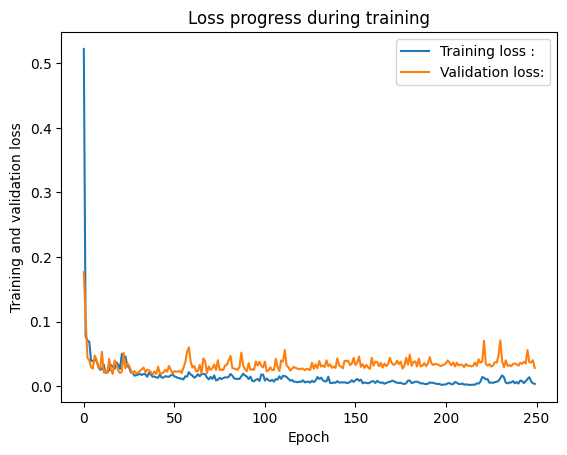

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss : ','Validation loss:'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test_scale)

# If y_pred has multiple output values, select the appropriate column
y_pred = y_pred[:, 0]

# Reshape y_pred to match the shape of y_test_scale
y_pred = np.reshape(y_pred, y_test_scale.shape)

r2 = r2_score(y_test_scale, y_pred)
mse = mean_squared_error(y_test_scale, y_pred)
mae = mean_absolute_error(y_test_scale, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_scale, y_pred))

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


2/2 [==============================] - 0s 9ms/step
R2 score: 0.9667066285531474
Mean Squared Error: 0.03329337144685257
Mean Absolute Error: 0.13548116390036538
Root Mean Squared Error: 0.18246471288129268


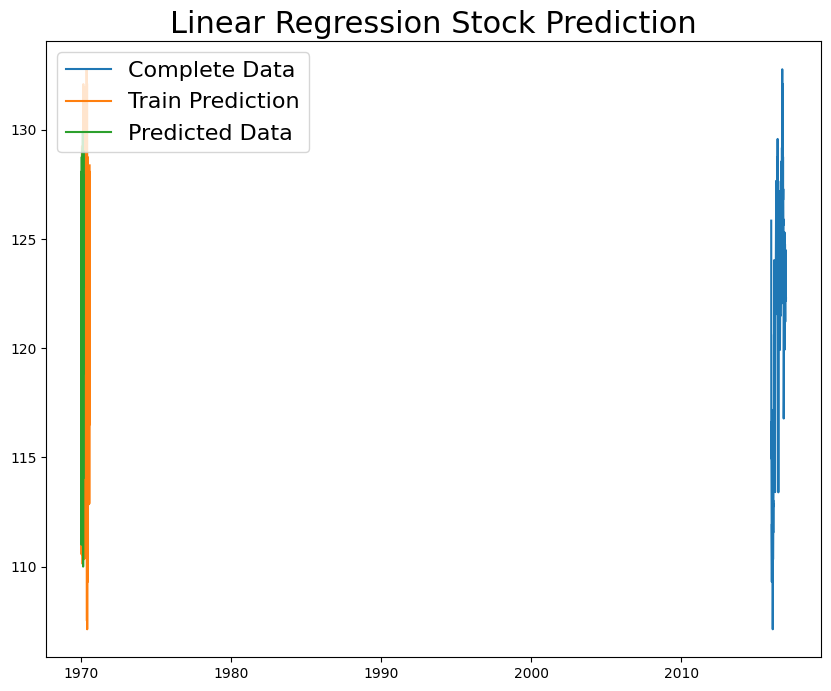

In [ ]:
complete_data = y
train_predictions = y_train
test_predictions = y_test

# Plotting the data
plt.figure(figsize=(10, 8))
plt.plot(complete_data, label='Complete Data')
plt.plot(train_predictions, label='Train Prediction')
plt.plot(test_predictions, label='Predicted Data')
plt.title('Linear Regression Stock Prediction', fontsize=22)
plt.legend(loc='upper left', fontsize=16)
plt.show()